In [1]:
%cd ..

/Users/maxschettewi/PycharmProjects/Low-Latency-Limit-Order-Book-Prediction


/Users/maxschettewi/PycharmProjects/HPML Final Project/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import torch

In [3]:
try: 
    obj = torch.load("data/processed/fi2010_processed.pt", weights_only=False)
except FileNotFoundError as e:
    print("First download data by running `python scripts/load_data.py`")
    raise e

lob = obj["lob"]
N, F = lob.shape
seq_labels = obj["seq_labels"]
window_size = obj["window_size"]
horizon = obj["horizon"]
mean = obj["mean"]
std = obj["std"]



KeyboardInterrupt



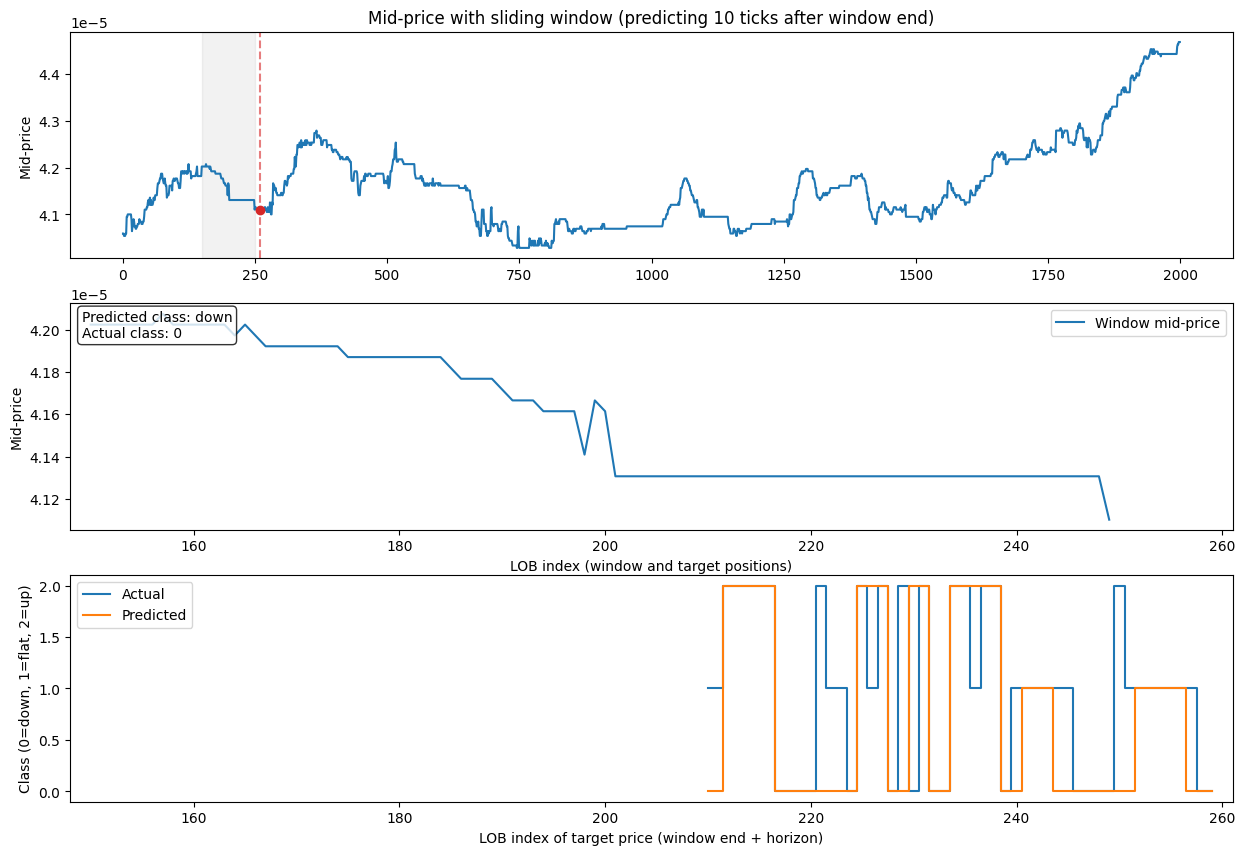

In [4]:
import torch
from src.lob.data.dataset import get_datasets
from src.lob.models.transformer import LOBTransformer, ModelConfig
from src.lob.visualize.stream import visualize

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    ckpt = torch.load("checkpoints/transformer_balanced.pt", map_location=device)
except FileNotFoundError as e:
    print("First train the model by running `python scripts/train.py`")

state_dict = ckpt["model_state_dict"]
if any(k.startswith("_orig_mod.") for k in state_dict):
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in state_dict.items()}

config = ModelConfig.base()
model = LOBTransformer(config)
model.load_state_dict(state_dict)
model.to(device).eval()

train_dataset, _, _ = get_datasets()
visualize(model=model, obj=obj, visualization_sleep=0.0001)
